<a href="https://colab.research.google.com/github/DaniSumaili/7048CEM/blob/main/Presentation_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA of Breast Cancer Gene Expression GSE45827

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import matthews_corrcoef,cohen_kappa_score, mean_absolute_error,mean_squared_error 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
breastdata = pd.read_csv('/content/drive/My Drive/BreastCancer/Breast_GSE45827.csv')

In [ ]:
breastdata.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,9.015007,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,9.371174,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,8.842430,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,10.554449,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,

In [ ]:
bc = breastdata.copy()

#change the type(target class) column into category 
bc["type"] = bc["type"].astype('category')
bc["type_cat"] = bc["type"].cat.codes


In [ ]:
X = bc.iloc[:, 2:-1]
y = bc.type_cat

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, matthews_corrcoef, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score, mean_absolute_error,mean_squared_error 

**average**{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} default=’binary’
This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'**binary**':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'**samples**':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [ ]:
names = ["SVM", "Decision Tree","Random Forest","Naive Bayes","MLP","kNN" ]

classifiers =[svm.SVC(kernel= 'poly', C=1, random_state= 42),
              tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2),
              RandomForestClassifier(),
              MultinomialNB(),
              MLPClassifier(hidden_layer_sizes =(10,), batch_size = 100, learning_rate_init = 0.3, momentum= 0.2, validation_fraction=0),
              KNeighborsClassifier(n_neighbors=1, algorithm= 'brute')
              ]

model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0


for name, clf in zip(names, classifiers):
  scores = cross_val_score(clf, X, y, cv= 3)  
  df.loc[index,'Classifiers'] = name
  df.loc[index,'Accuracy'] = scores.mean()
  
  df.loc[index, 'Precision'] = precision_score(y, (cross_val_predict(clf, X,y,cv=3)), average='micro')
  df.loc[index,'Recall'] = recall_score(y, (cross_val_predict(clf, X,y,cv=3)), average='micro')
  df.loc[index,'F1 Score'] = f1_score(y, (cross_val_predict(clf, X,y,cv=3)), average='micro')
  df.loc[index,'MCC'] = matthews_corrcoef(y, (cross_val_predict(clf, X,y,cv=3)))  
  df.loc[index,'Kappa'] = cohen_kappa_score(y , (cross_val_predict(clf, X,y,cv=3)))
  #df.loc[index, 'MAE'] = mean_absolute_error(y , (cross_val_predict(clf, X,y,cv=3)) ,multioutput= 'uniform_average' )
  #df.loc[index, 'RMSE'] = mean_squared_error(y , (cross_val_predict(clf, X,y,cv=3)), squared=False )
 
  index += 1


In [ ]:
print("\033[1m"  +'             ' +  ' Classification Metric Evaluation scores'  + "\033[0m"    )
df

              Classification Metric Evaluation scores


,Classifiers,Accuracy,Precision,Recall,F1 Score,MCC,Kappa
0,SVM,0.940261,0.940397,0.940397,0.940397,0.925662,0.925510
1,Decision Tree,0.807843,0.788079,0.794702,0.748344,0.753867,0.744068
2,Random Forest,0.953464,0.933775,0.920530,0.953642,0.925433,0.933670
3,Naive Bayes,0.933464,0.933775,0.933775,0.933775,0.917389,0.917238
4,MLP,0.238170,0.192053,0.271523,0.225166,0.007148,-0.003147
5,kNN,0.794510,0.794702,0.794702,0.794702,0.751304,0.744403


                 Classification Metric Evaluation graph


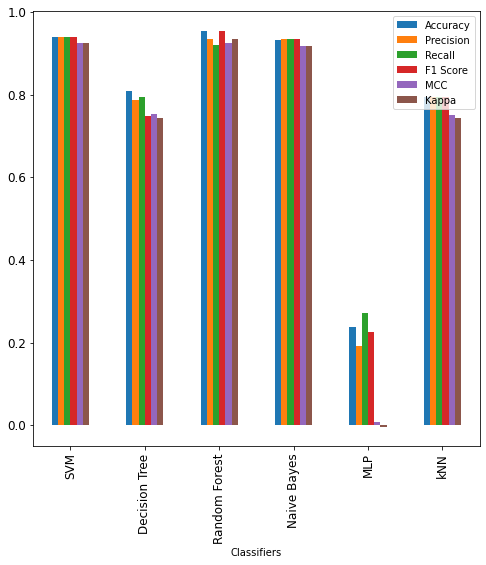

In [ ]:
#ax = df2.plot.bar(rot=0)
df2 = df.copy()
print("\033[1m"  +'                ' +  ' Classification Metric Evaluation graph'  + "\033[0m"    )
ax = df2.set_index('Classifiers').plot.bar(rot=90,  figsize=(8,8), fontsize = 12)#title = 'Classifiers',

Classifiers- with improvements 

**MLP**: MLPClassifier(hidden_layer_sizes =(10,), batch_size = 100, learning_rate_init = 0.3, momentum= 0.2, validation_fraction=0,
                      activation= 'identity'
**kNN**: KNeighborsClassifier(n_neighbors=5, algorithm= 'brute')

In [ ]:
names_2 = ["SVM", "Decision Tree","Random Forest","Naive Bayes","MLP","kNN" ]

classifiers_2 =[svm.SVC(kernel= 'poly', C=1, random_state= 42),
              tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2),
              RandomForestClassifier(),
              MultinomialNB(),
              MLPClassifier(hidden_layer_sizes =(10,), batch_size = 100, learning_rate_init = 0.3, momentum= 0.2, validation_fraction=0, activation= 'identity'),
              KNeighborsClassifier(n_neighbors=5, algorithm= 'brute')
              ]

model_cols_2 = []

df_2=pd.DataFrame(columns=model_cols_2)
index_2= 0


for name, clf in zip(names_2, classifiers_2):
  scores_2 = cross_val_score(clf, X, y, cv= 5)  
  df_2.loc[index_2,'Classifiers'] = name
  df_2.loc[index_2,'Accuracy'] = scores_2.mean()
  #y_pred=cross_val_predict(clf, X,y,cv=3)
  df_2.loc[index_2, 'Precision'] = precision_score(y, (cross_val_predict(clf, X,y,cv=5)), average='micro')
  df_2.loc[index_2,'Recall'] = recall_score(y, (cross_val_predict(clf, X,y,cv=5)), average='micro')
  df_2.loc[index_2,'F1 Score'] = f1_score(y, (cross_val_predict(clf, X,y,cv=5)), average='micro')
  df_2.loc[index_2,'MCC'] = matthews_corrcoef(y, (cross_val_predict(clf, X,y,cv=5)))
  df_2.loc[index_2,'Kappa'] = cohen_kappa_score(y , (cross_val_predict(clf, X,y,cv=5)))
  

  index_2+= 1


In [ ]:
print("\033[1m"  +'             ' +  ' Classification Metric Evaluation scores v2'  + "\033[0m"    )
df_2

              Classification Metric Evaluation scores v2


,Classifiers,Accuracy,Precision,Recall,F1 Score,MCC,Kappa
0,SVM,0.946882,0.947020,0.947020,0.947020,0.934378,0.933866
1,Decision Tree,0.854624,0.801325,0.827815,0.801325,0.778896,0.776908
2,Random Forest,0.960430,0.966887,0.960265,0.973510,0.958624,0.917033
3,Naive Bayes,0.933333,0.933775,0.933775,0.933775,0.917389,0.917238
4,MLP,0.847957,0.894040,0.801325,0.827815,0.834777,0.792765
5,kNN,0.860430,0.860927,0.860927,0.860927,0.835577,0.826646


                 Classification Metric Evaluation graph v2


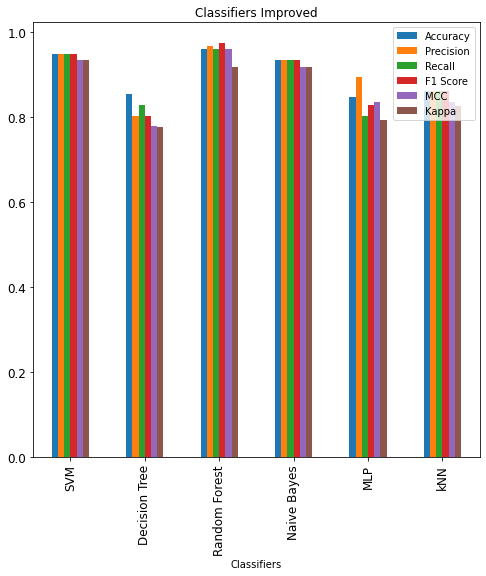

In [ ]:
df_22 = df_2.copy()
print("\033[1m"  +'                ' +  ' Classification Metric Evaluation graph v2'  + "\033[0m"    )
ax = df_22.set_index('Classifiers').plot.bar(rot=90, title = 'Classifiers Improved', figsize=(8,8), fontsize = 12)
